## Observations and Insights 

In [2]:
print("Summary of Data Analysis:")
print("--------------------------")
print("Total of mice (including 125 males and 124 female)were tested for ten anti-tumor drugs (Ramicane, Capomulin, Infubinol, Placebo, Ceftamin,Stelasyn, Zoniferol, Ketapril, Propriva, and Naftisol).") 
print("However due to the experimental error, one mouse has taken out from the data analysis(Total of 248 mice were tested).") 
print("There is no significant gender biased effect to the drugs regimens tested, because the distribution of gender percantages thoughout the experiment was very closer, Male=50.95% and Female=49.04%.")
print("Out of all tested drugs Capomulin, Ramicane, Infubinol and  Ceftamin have shown more efective results for anti-tumor acvitity compared to the other six regimens.") 
print("The best anti-tumor activity has shown by Capomulin. (Final average tumor volume  = 40.67 mm3 and higest survival rate of mice (total test count = 230).")
print("The Ramicane regimen also had much closer response to Capomulin ((Final average tumor volume  = 40.22 mm3) and (total test count = 228)")
print("There was no sufficent correlation between final tumor volume(mm3) and the weight of mouse(g) of Capomulin treated group per the analysed data. (R2 = 0.435 indicates that less than 50% of the variability in the outcome data cannot be explained by the experiment.")  

Summary of Data Analysis:
--------------------------
Total of mice (including 125 males and 124 female)were tested for ten anti-tumor drugs (Ramicane, Capomulin, Infubinol, Placebo, Ceftamin,Stelasyn, Zoniferol, Ketapril, Propriva, and Naftisol).
However due to the experimental error, one mouse has taken out from the data analysis(Total of 248 mice were tested).
There is no significant gender biased effect to the drugs regimens tested, because the distribution of gender percantages thoughout the experiment was very closer, Male=50.95% and Female=49.04%.
Out of all tested drugs Capomulin, Ramicane, Infubinol and  Ceftamin have shown more efective results for anti-tumor acvitity compared to the other six regimens.
The best anti-tumor activity has shown by Capomulin. (Final average tumor volume  = 40.67 mm3 and higest survival rate of mice (total test count = 230).
The Ramicane regimen also had much closer response to Capomulin ((Final average tumor volume  = 40.22 mm3) and (total test co

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# Display the data table for preview
Combined_data_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
Unique_mice_count = len(Combined_data_df["Mouse ID"].value_counts())
Unique_mice_count
count = Combined_data_df["Mouse ID"].count()
print(f"Totoal number of mice tested: {Unique_mice_count}")
print(f"Number of tests: {count}")

Totoal number of mice tested: 249
Number of tests: 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = Combined_data_df[Combined_data_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
All_records_g989 = Combined_data_df.loc[Combined_data_df["Mouse ID"] == "g989"]
All_records_g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df = Combined_data_df.drop(range(908, 921, 1))
Clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
Mice_count = len(Clean_df["Mouse ID"].value_counts())
Mice_count 

Test_count = Clean_df["Mouse ID"].count()

print(f"Totoal number of mice tested: {Mice_count}")
print(f"Number of tests: {Test_count}")

Totoal number of mice tested: 248
Number of tests: 1880


In [9]:
#Additinal to see the exact column names 
columns = Clean_df.columns.values.tolist()
drugs = Clean_df["Drug Regimen"].unique()
columns
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Drug_Regimen_Group = Clean_df.groupby("Drug Regimen")

Tumor_Volume_mean = Drug_Regimen_Group["Tumor Volume (mm3)"].mean()

Tumor_Volume_median = Drug_Regimen_Group["Tumor Volume (mm3)"].median()

Tumor_Volume_variance = Drug_Regimen_Group["Tumor Volume (mm3)"].var()

Tumor_Volume_STD = Drug_Regimen_Group["Tumor Volume (mm3)"].std()

Tumor_Volume_SEM = Drug_Regimen_Group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
Tumor_Volume_Stat = pd.DataFrame({"Mean":Tumor_Volume_mean, "Median":Tumor_Volume_median, "Variance":Tumor_Volume_variance,"Standard Deviation":Tumor_Volume_STD, "SEM":Tumor_Volume_SEM})


# Additional: Formatting 
Tumor_Volume_Stat["Mean"] = Tumor_Volume_Stat["Mean"].map("{:.2f}".format)
Tumor_Volume_Stat["Median"]  = Tumor_Volume_Stat["Median"].map("{:,.2f}".format)
Tumor_Volume_Stat["Variance"]  = Tumor_Volume_Stat["Variance"].map("{:,.2f}".format)
Tumor_Volume_Stat["Standard Deviation"]  = Tumor_Volume_Stat["Standard Deviation"].map("{:,.2f}".format)
Tumor_Volume_Stat["SEM"]  = Tumor_Volume_Stat["SEM"].map("{:,.2f}".format)

# Create dataframne to display sumamry table
Tumor_Volume_Stat.head(10)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Tumor_Volume_Agg_Stat_df = Drug_Regimen_Group["Tumor Volume (mm3)"].describe()
Tumor_Volume_Agg_Stat_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Test Count Vs Drug Regimen')

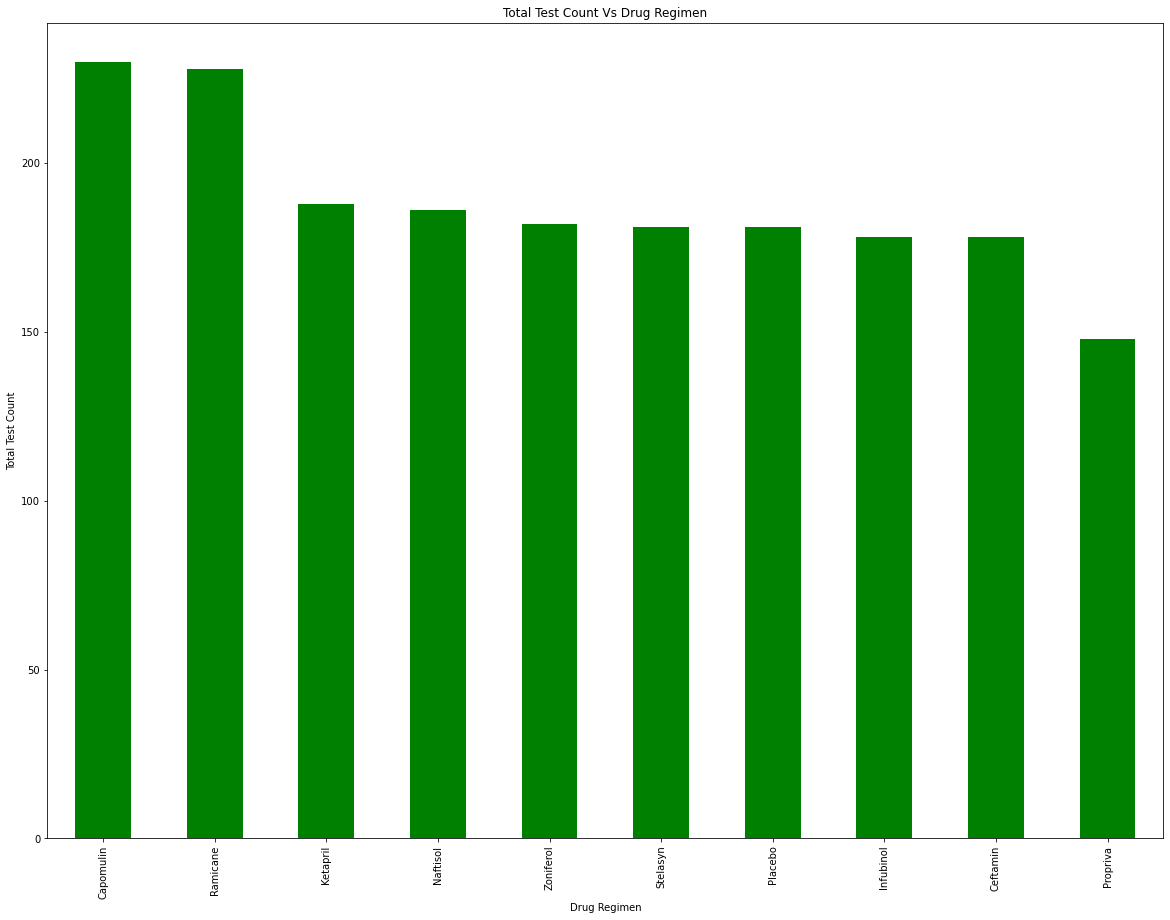

In [129]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#DataFrame.plot()
Test_counts_df = Clean_df["Drug Regimen"].value_counts()
Test_counts_df.head(10)
Chart = Test_counts_df.plot(kind ="bar", facecolor="green")

# Set the xlabel and ylabel using class methods
Chart.set_xlabel("Drug Regimen")
Chart.set_ylabel("Total Test Count")
Chart.set_title("Total Test Count Vs Drug Regimen")


In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugs))
y_axis = Tumor_Volume_Agg_Stat_df["count"]


Text(0.5, 1.0, 'Total Test Count Vs Drug Regimen')

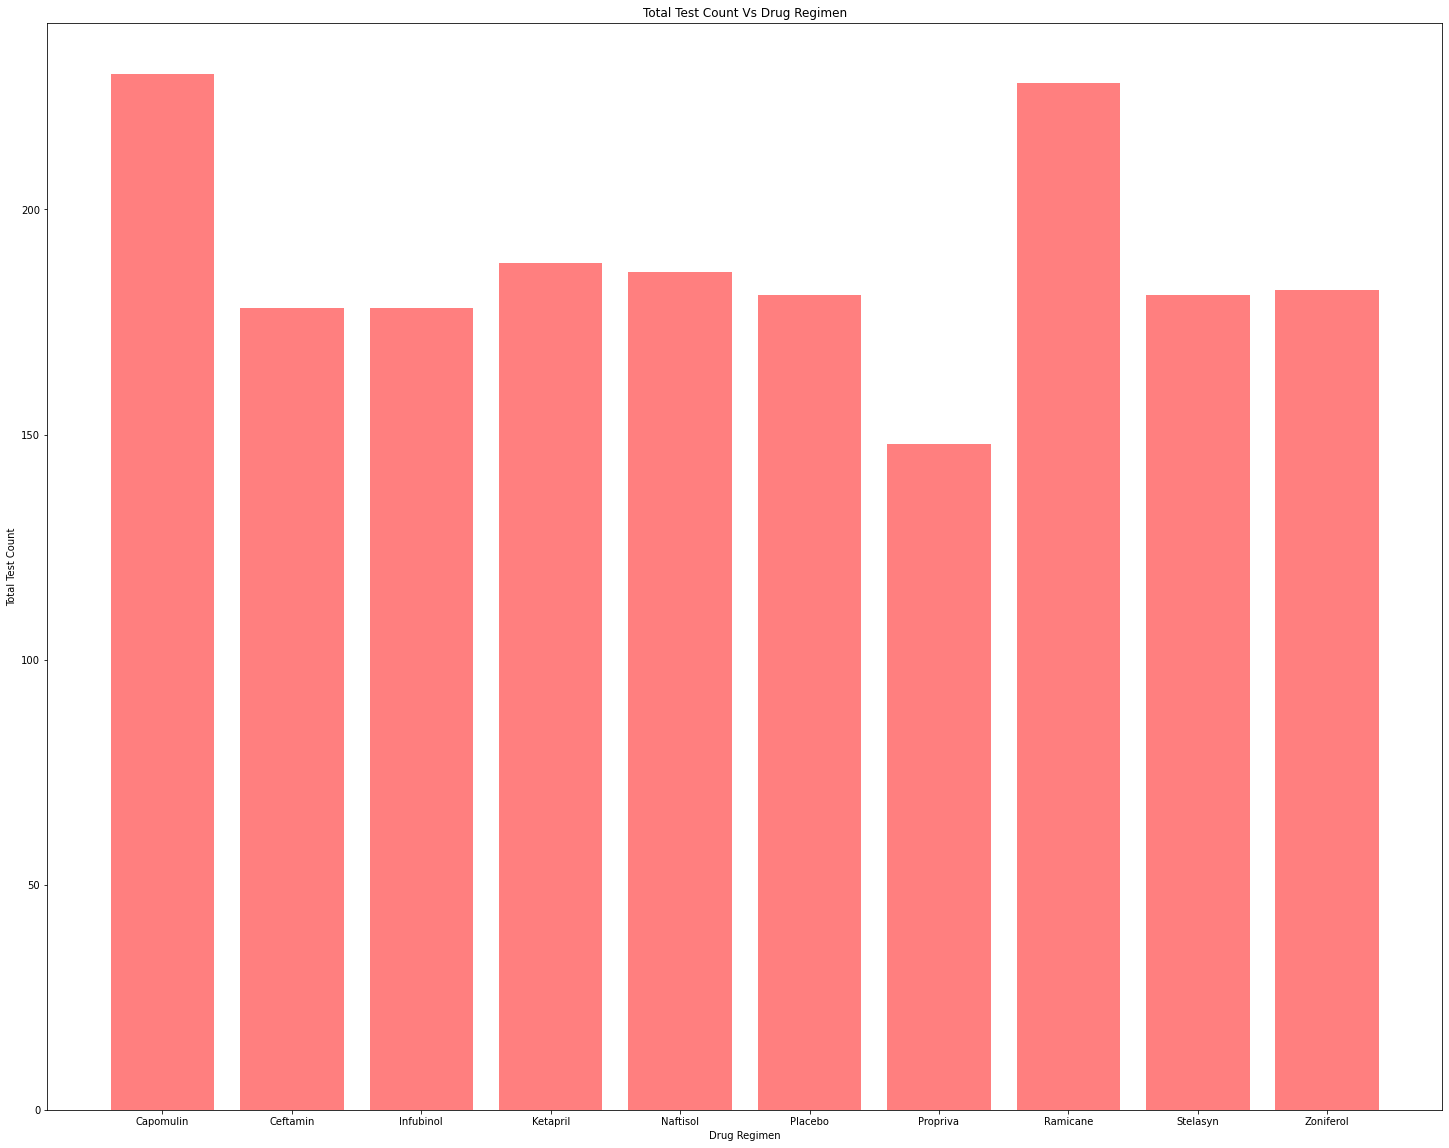

In [23]:
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
# additional: Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
#Additinal: Increase the plot size for better visualization of x axis 
plt.rcParams["figure.figsize"]=(25, 20)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Test Count")
plt.title("Total Test Count Vs Drug Regimen")

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Clean_df["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [133]:
Gender_summary_df = pd.DataFrame({"Gender": ["Male", "Female"],
                                  "Total Count":[958, 922]})
Gender_summary_df = Gender_summary_df.set_index("Gender")
Gender_summary_df 

,Total Count
Gender,
Male,958
Female,922


In [134]:
# additional
Clean_df["Sex"].value_counts(normalize=True)

Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

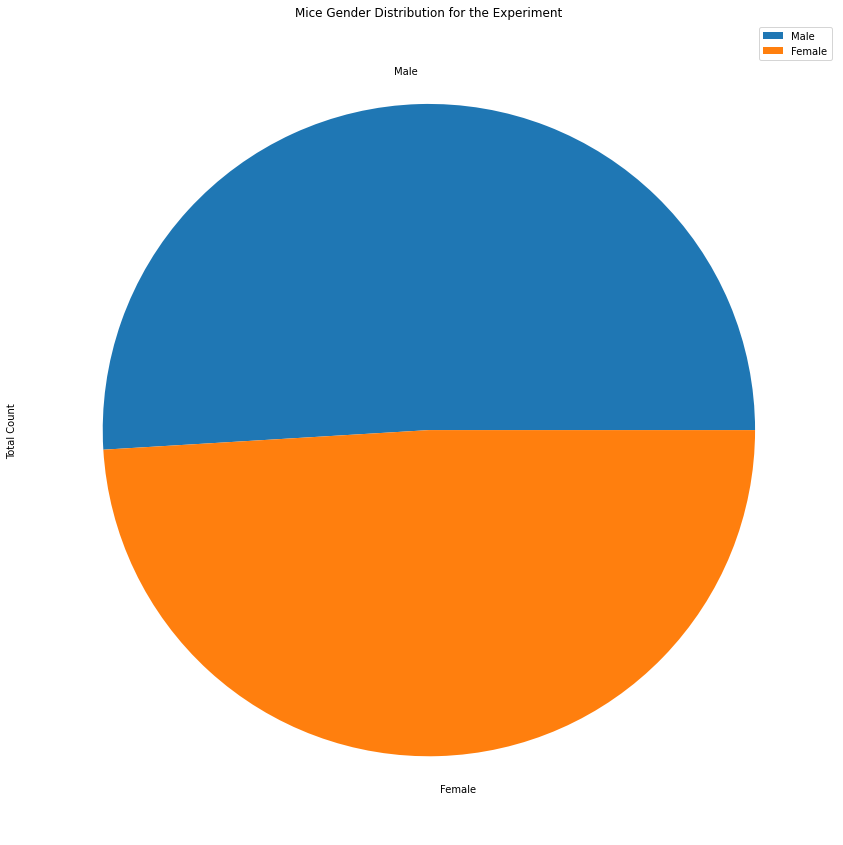

In [135]:
Chart_pie = Gender_summary_df.plot(kind ="pie", y="Total Count", title=("Mice Gender Distribution for the Experiment"))


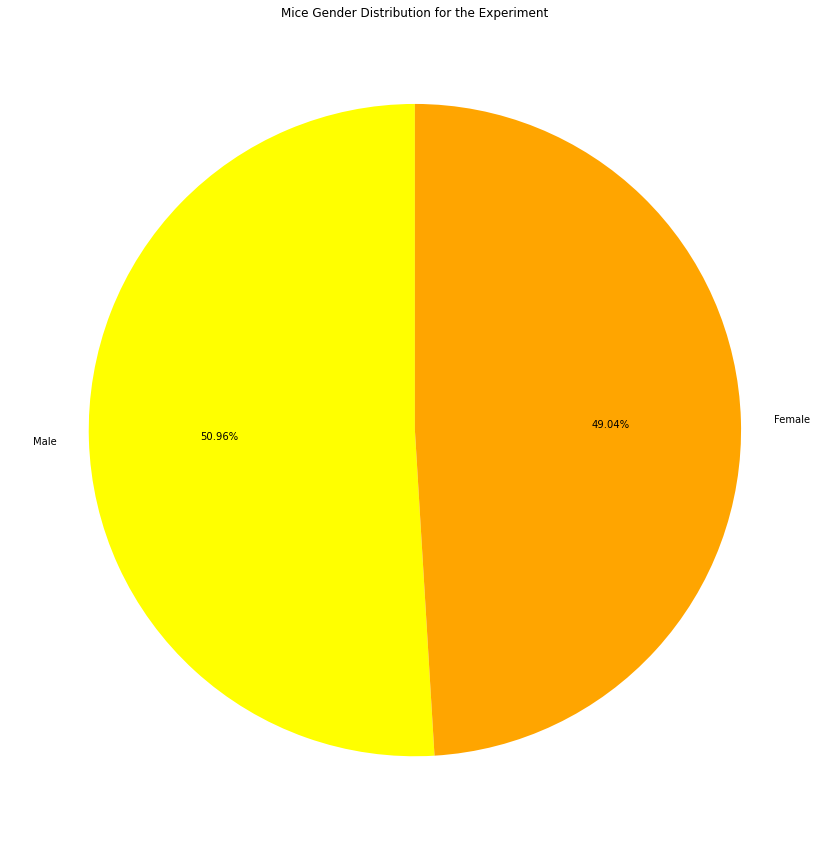

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["yellow", "orange"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%.2f%%", shadow=False, startangle=90)
plt.title("Mice Gender Distribution for the Experiment")
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_TumorVl = Clean_df.groupby("Mouse ID")["Timepoint"].max().sort_values()

max_TumorVolume_Df = max_TumorVl.reset_index().rename(columns={"Timepoint": "Max_TimePoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(Clean_df, max_TumorVolume_Df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_TimePoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [138]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
values = []
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    final_vol_df = temp_df.loc[temp_df["Timepoint"] == temp_df["Max_TimePoint"]]
    value = final_vol_df["Tumor Volume (mm3)"]
    values.append(value)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset  
    # Determine outliers using upper and lower bounds
    quartiles = value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The IQR of {drug}: {iqr}")
  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {drug} {lower_bound} could be outliers.")
    print(f"Values above {drug} {upper_bound} could be outliers.")
    
    outliers_count = (value.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')    

The IQR of Capomulin: 7.781863460000004
Values below Capomulin 20.70456164999999 could be outliers.
Values above Capomulin 51.83201549 could be outliers.
Number of Capomulin outliers: 0
The IQR of Ramicane: 9.098536719999998
Values below Ramicane 17.912664470000003 could be outliers.
Values above Ramicane 54.30681135 could be outliers.
Number of Ramicane outliers: 0
The IQR of Infubinol: 11.477135160000003
Values below Infubinol 36.83290494999999 could be outliers.
Values above Infubinol 82.74144559000001 could be outliers.
Number of Infubinol outliers: 1
The IQR of Ceftamin: 15.577752179999997
Values below Ceftamin 25.355449580000002 could be outliers.
Values above Ceftamin 87.66645829999999 could be outliers.
Number of Ceftamin outliers: 0


Outlier found in Infubinol


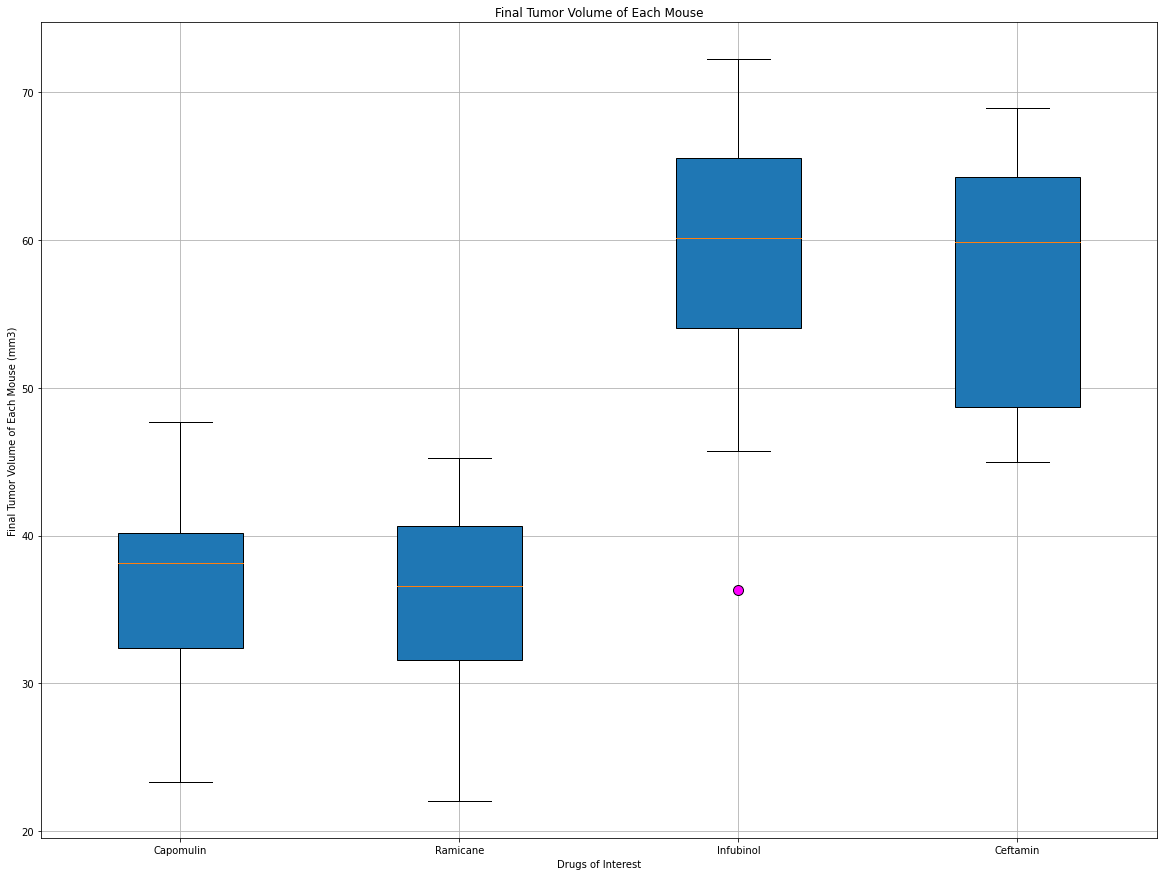

In [153]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(values, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
                  notch=False, patch_artist=True,
                  flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
plt.title("Final Tumor Volume of Each Mouse")
plt.xlabel("Drugs of Interest")
plt.ylabel("Final Tumor Volume of Each Mouse (mm3)")
plt.grid()
print("Outlier found in Infubinol")

## Line and Scatter Plots

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [96]:
#select a mouse
Mouse_s185_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
Mouse_s185_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


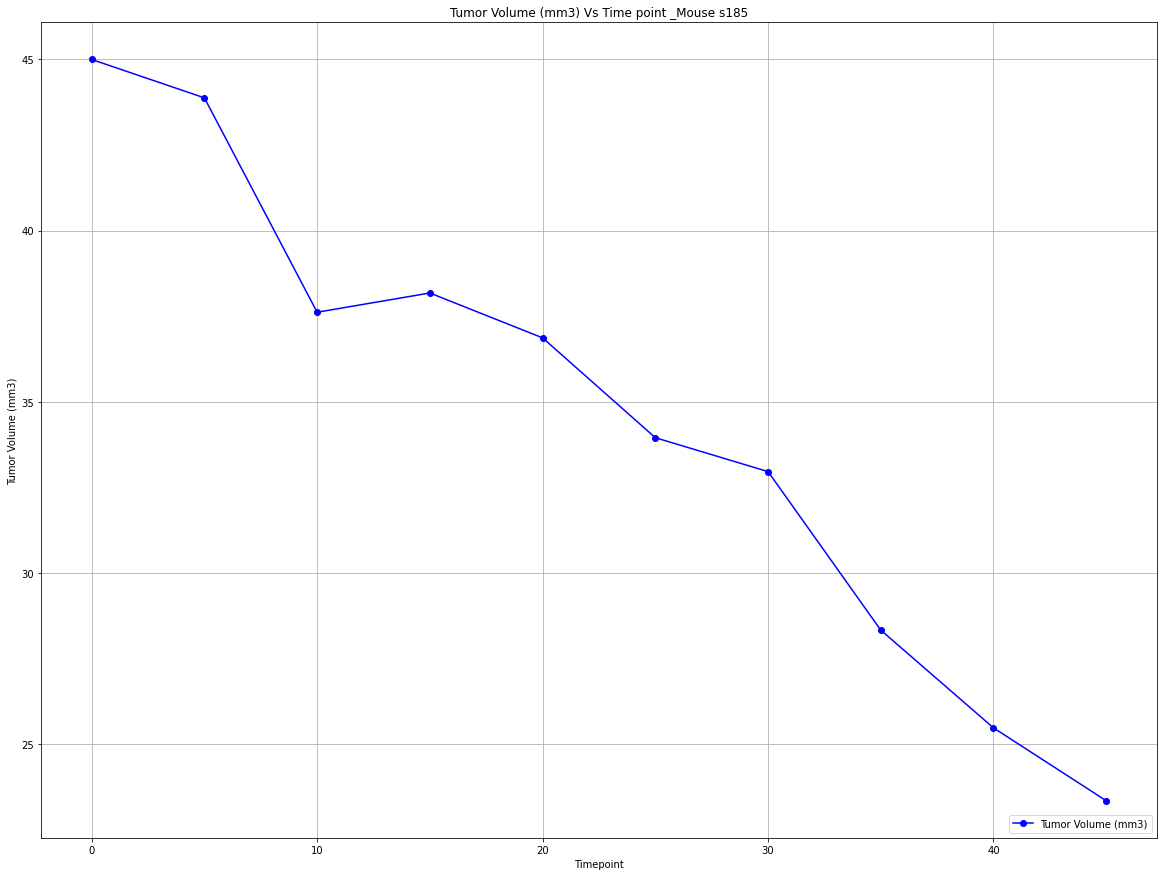

In [97]:
y_axis = Mouse_s185_df["Tumor Volume (mm3)"]
x_axis = Mouse_s185_df["Timepoint"]
plt.plot(x_axis, y_axis, marker ='o', color='blue', label="Tumor Volume (mm3)")
plt.legend(loc="lower right")

plt.title("Tumor Volume (mm3) Vs Time point _Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Group = Clean_df.groupby("Mouse ID")

Avg_Capomulin_Tumor_Volume = Capomulin_Group["Tumor Volume (mm3)"].mean()
Avg_Capomulin_Mouse_weight = Capomulin_Group["Weight (g)"].mean()

Capomulin_Stat = pd.DataFrame({"Average Tumor Volume":Avg_Capomulin_Tumor_Volume, "Mouse Weight (g)":Avg_Capomulin_Mouse_weight})
Capomulin_Stat

,Average Tumor Volume,Mouse Weight (g)
Mouse ID,,
a203,56.312708,23
a251,55.237095,25
a262,58.611631,29
a275,52.770965,28
a366,54.639906,29
...,...,...
z435,46.942214,26
z578,38.411510,16
z581,53.979584,25


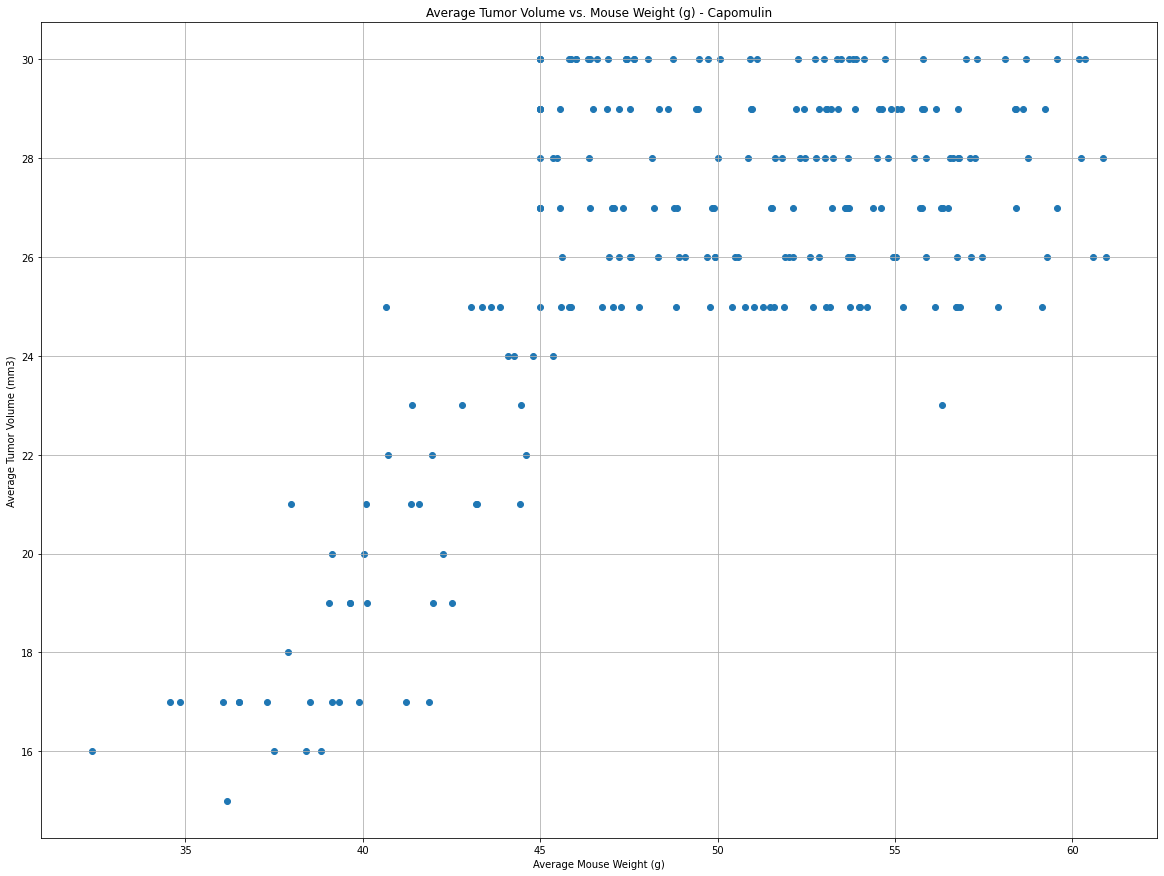

In [103]:
plt.scatter(Avg_Capomulin_Tumor_Volume, Avg_Capomulin_Mouse_weight)
plt.title("Average Tumor Volume vs. Mouse Weight (g) - Capomulin")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

## Correlation and Regression

The correlation coefficient is: 0.43501643801595974


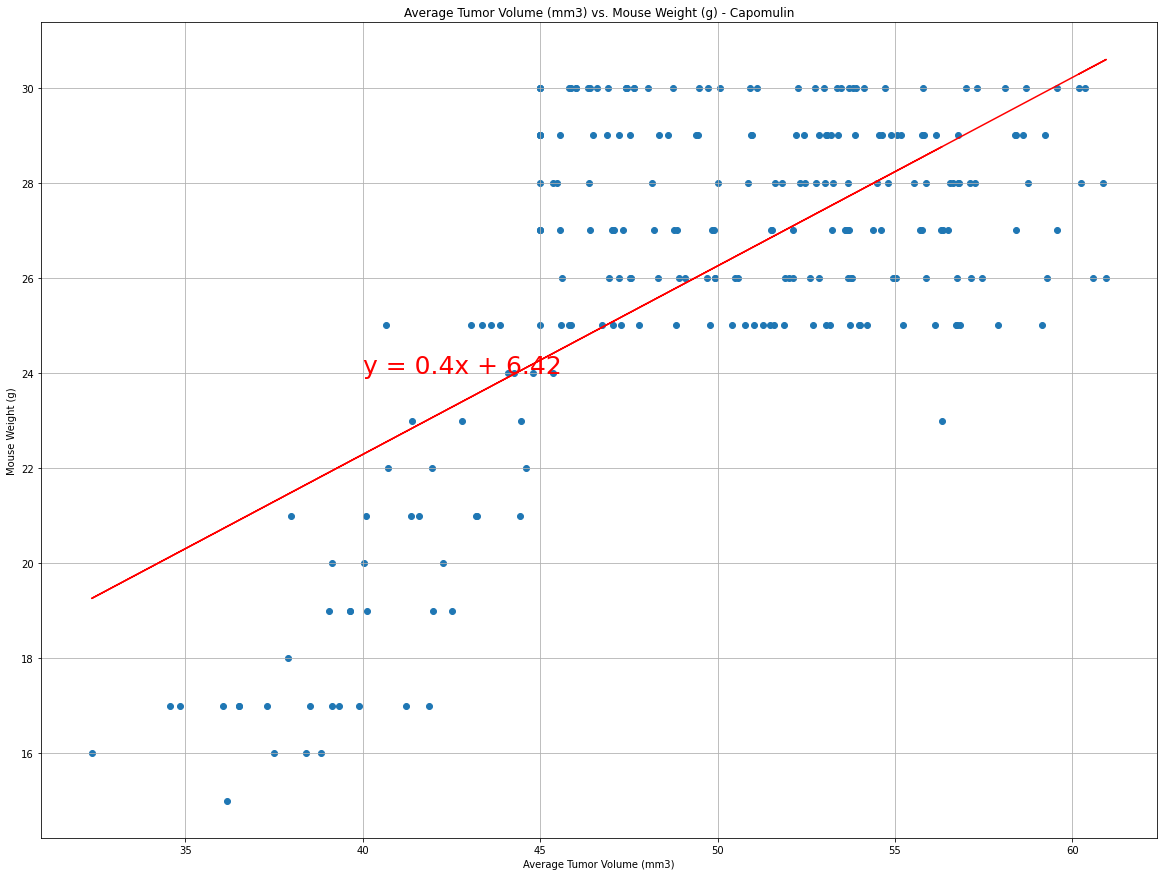

'y = 0.4x + 6.42'

In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Avg_Capomulin_Tumor_Volume
y_values = Avg_Capomulin_Mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,24),fontsize=25,color="red")
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g) - Capomulin")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.grid()
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()
line_eq



In [ ]:
#The End! :) 